In [10]:
from functions import *


lunar = './data/lunar/test/data/S12_GradeB'
lunar_2 = './data/lunar/test/data/S15_GradeA'
lunar_3 = './data/lunar/test/data/S15_GradeB'
lunar_4 = './data/lunar/test/data/S16_GradeA'
lunar_5 = './data/lunar/test/data/S16_GradeB'
mars = './data/mars/test/data'
earth = './data/EARTH/EARTH/'


Cantidad de datos en el directorio ./data/lunar/test/data/S12_GradeB : 64
df:  6.625
Picos encontrados en los tiempos: [48739.01886792 75279.54716981]
Amplitud del pico (CFT): [1.80075783 1.25820258]
Pico en tiempo 48739.018867924526 tiene una confianza de [1.00]
Pico en tiempo 75279.54716981133 tiene una confianza de [0.24]
Indices de los Picos  [322896 498727]
Tiempos de los Picos  [48739.01886792 75279.54716981]


/tmp/ipykernel_8584/2814787709.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(index[0])


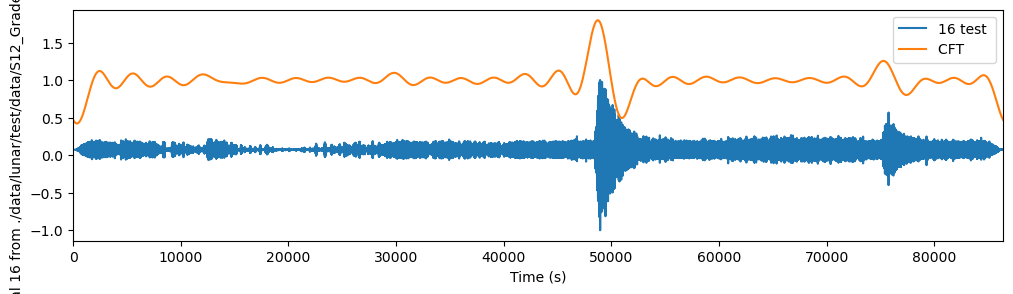

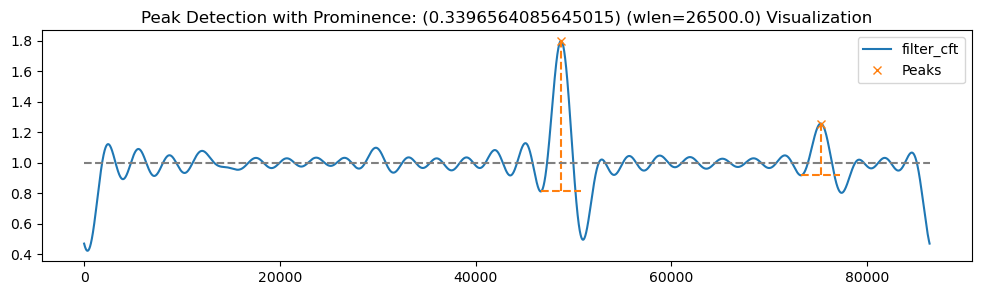

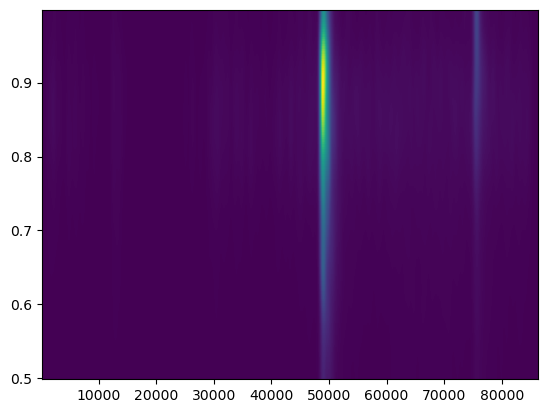

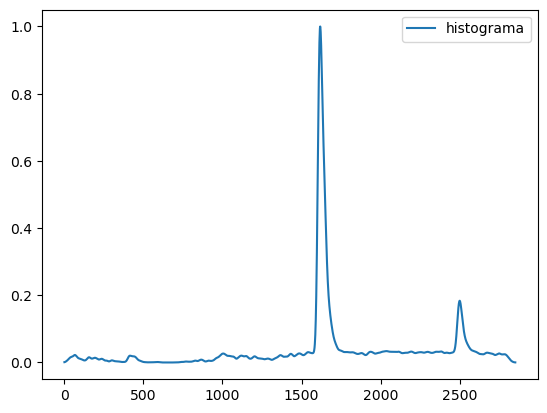

Picos encontrados en los tiempos: [48996.22641509 75622.64150943]
Amplitud del pico (CFT): [1.         0.18372048]
Pico en tiempo 48996.22641509434 tiene una confianza de [1.00]
Pico en tiempo 75622.64150943396 tiene una confianza de [0.03]


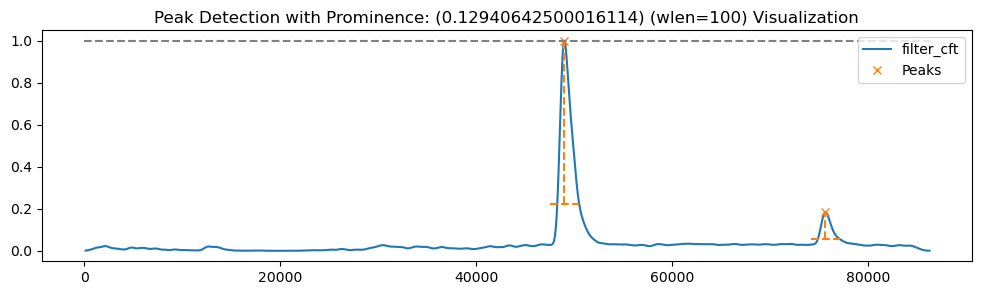

In [11]:
#sospechosos = [12,18, 9, 2] lunar
#sospechosos_lunar_2 = [3]
id = 16#np.random.randint(0,63)#18
data_directory = lunar
tr_times, tr_data_filt_norm, df, tr_data= data_extrac_test(id, data_directory=data_directory)
#tr_times=tr_times[:90000]
#tr_data= tr_data[:90000]
#tr_data_filt_norm=tr_data_filt_norm[:90000]
print('df: ', df)
cft = CFT(tr_data_filt_norm, df)#, 10,50)
filtered_cft_real = fourier_filter(cft)
# Plot raw data 
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(tr_times, tr_data_filt_norm, label=f'{id} test ')
ax.plot(tr_times, filtered_cft_real, label=f'CFT ')
ax.set_xlim([min(tr_times),max(tr_times)])

#ax.axvline(x = arrival, color='red',label='Rel. Arrival')


#ax.axvline(x = max_pos, color='green')#,label='Rel. Arrival')
#ax.set_xlim([72000,76000])
ax.set_xlabel('Time (s)')
ax.set_ylabel(f'Signal {id} from {data_directory} function')
ax.legend()

peaks, properties = peaks_plot(tr_times, filtered_cft_real, prominence=0.25, distance=5000*df, wlen_value=4000*df, height=1.0)
#def confianza(signal, peaks):
index_peaks= peaks
time_peaks= tr_times[peaks]

print('Indices de los Picos ', index_peaks)
print('Tiempos de los Picos ', time_peaks)

#Proximamente valores de confianza
confianza=np.zeros(len(peaks))
frequencies, times, sxx = signal.spectrogram(tr_data, df, nperseg=2000, noverlap=1800) ##argumentos de resolucion en frequencies y tiempo

#sxx = sxx[:,np.where(frequencies>0.5)]
#print(np.where(frequencies>0.5))


low_index = get_index_from_f(frequencies, 0.5)
up_index = get_index_from_f(frequencies, 1)

#Filter
sxx= sxx[low_index:up_index, :]
frequencies= frequencies[low_index:up_index]


hist, conv = hist_convolve_spectrogram(sxx, 10)
plt.show()
plt.pcolormesh(times,frequencies,conv)
plt.show()




plt.plot(hist, label='histograma')


plt.legend()

plt.show()

_, properties = peaks_plot(times, hist, prominence=hist.mean(), distance=10, wlen_value=100, height=0.0)

plt.show()
